<a href="https://colab.research.google.com/github/prernakukreja5/Satellite_imagery_housing_price_prediction/blob/main/tabular_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("train(1).csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [ ]:
features = ["bedrooms", "bathrooms", "sqft_living", "lat", "long"]
target = "price"

df_model = df[features + [target]]
df_model.isnull().sum()


,0
bedrooms,0
bathrooms,0
sqft_living,0
lat,0
long,0
price,0


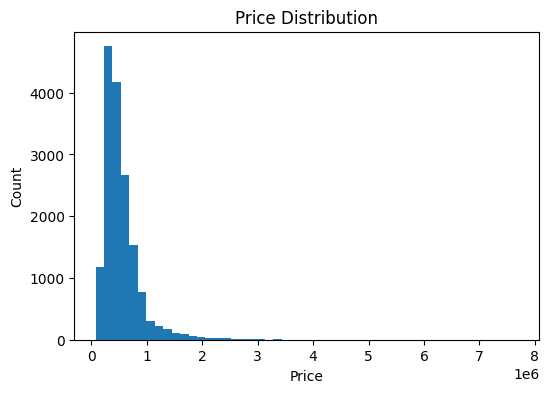

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df_model["price"], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.show()


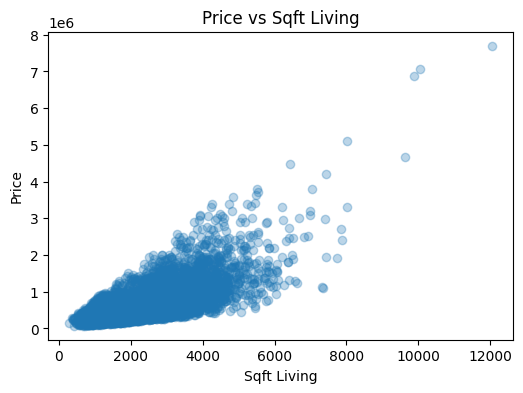

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df_model["sqft_living"], df_model["price"], alpha=0.3)
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.title("Price vs Sqft Living")
plt.show()


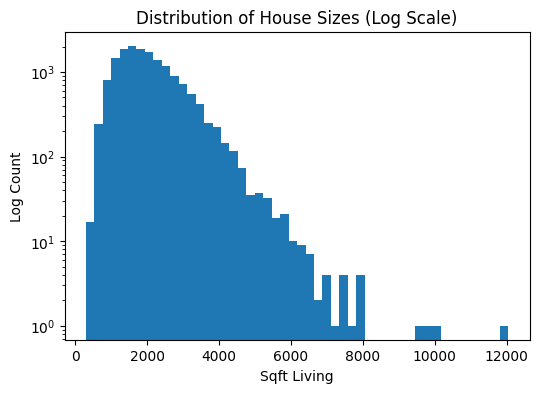

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df_model["sqft_living"], bins=50, log=True)
plt.xlabel("Sqft Living")
plt.ylabel("Log Count")
plt.title("Distribution of House Sizes (Log Scale)")
plt.show()



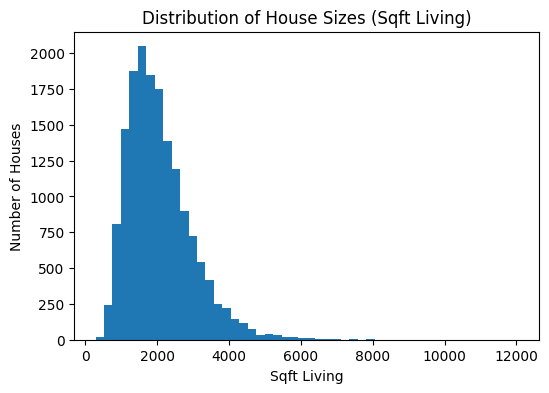

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df_model["sqft_living"], bins=50)
plt.xlabel("Sqft Living")
plt.ylabel("Number of Houses")
plt.title("Distribution of House Sizes (Sqft Living)")
plt.show()


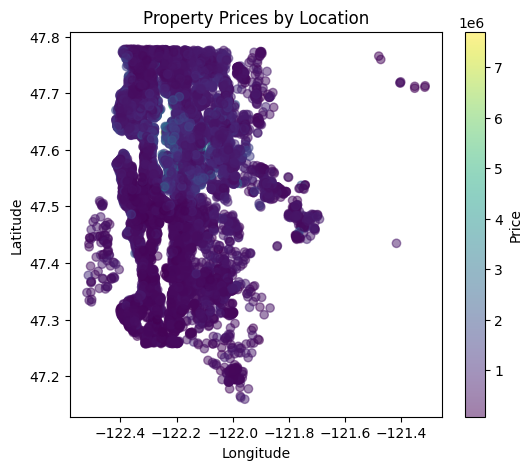

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(df_model["long"], df_model["lat"],
            c=df_model["price"], cmap="viridis", alpha=0.5)
plt.colorbar(label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Property Prices by Location")
plt.show()


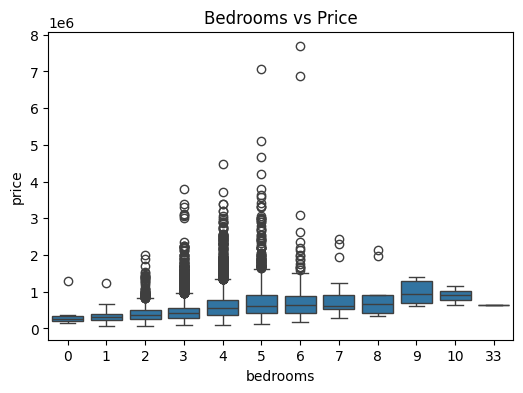

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_model["bedrooms"], y=df_model["price"])
plt.title("Bedrooms vs Price")
plt.show()


In [ ]:
df.columns



Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
eda_features = [
    "price",
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "floors",
    "lat",
    "long"
]

df_eda = df[eda_features]
df_eda[["sqft_living","bedrooms","floors"]].corr()

df_eda[["sqft_living","bedrooms","floors","bathrooms","price"]].corr()





,sqft_living,bedrooms,floors,bathrooms,price
sqft_living,1.000000,0.571198,0.348418,0.751945,0.700933
bedrooms,0.571198,1.000000,0.172445,0.512658,0.304454
floors,0.348418,0.172445,1.000000,0.504068,0.251428
bathrooms,0.751945,0.512658,0.504068,1.000000,0.525487
price,0.700933,0.304454,0.251428,0.525487,1.000000


In [ ]:

numeric_df = df.select_dtypes(include=[np.number])

# Explicitly drop identifiers / leakage columns
drop_cols = ["id"]
numeric_df = numeric_df.drop(columns=drop_cols, errors="ignore")


In [ ]:
# ============================================================
# FINAL ONE-STOP TABULAR PIPELINE
# TRAIN = train(1).csv
# TEST  = test2.csv
# NO TRAIN-TEST SPLIT (EXTERNAL TEST GIVEN)
# ============================================================

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor


# ============================================================
# LOAD DATA
# ============================================================
train_df = pd.read_csv("train(1).csv")
test_df  = pd.read_csv("test2.csv")


# ============================================================
# 🟢 LAYER 1: SEMANTIC FILTER (DROP ALWAYS)
# ============================================================
semantic_drop = ["id", "zipcode", "date"]

train_df = train_df.drop(columns=semantic_drop, errors="ignore")
test_df  = test_df.drop(columns=semantic_drop, errors="ignore")


# ============================================================
# 🟡 LAYER 2: STRUCTURAL REDUNDANCY CONTROL
# ============================================================
redundant_drop = [
    "sqft_above",
    "sqft_living15",
    "sqft_lot",
    "sqft_lot15"
]

train_df = train_df.drop(columns=redundant_drop, errors="ignore")
test_df  = test_df.drop(columns=redundant_drop, errors="ignore")


# ============================================================
# DEFINE FEATURES & TARGET
# ============================================================
target = "price"
feature_cols = [c for c in train_df.columns if c != target]

X_train = train_df[feature_cols]
y_train = np.log1p(train_df[target])   # log-transform target

X_test  = test_df[feature_cols]


# ============================================================
# 🔵 MODEL CONFIRMATION (RIDGE + XGBOOST)
# ============================================================

# ---------- Ridge Regression ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

ridge_importance = (
    pd.Series(ridge.coef_, index=feature_cols)
    .abs()
)
ridge_importance = ridge_importance / ridge_importance.max()


# ---------- XGBoost ----------
xgb = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_importance = pd.Series(
    xgb.feature_importances_,
    index=feature_cols
)
xgb_importance = xgb_importance / xgb_importance.max()


# ============================================================
# FINAL FEATURE SELECTION (CONSENSUS)
# ============================================================
final_score = (ridge_importance + xgb_importance).sort_values(ascending=False)

final_features = final_score[final_score > 0.25].index.tolist()

print("FINAL SELECTED FEATURES:")
print(final_features)


# ============================================================
# FINAL MODEL (RIDGE ON CLEAN FEATURES)
# ============================================================
X_train_final = X_train[final_features]
X_test_final  = X_test[final_features]

scaler_final = StandardScaler()
X_train_final_scaled = scaler_final.fit_transform(X_train_final)
X_test_final_scaled  = scaler_final.transform(X_test_final)

final_model = Ridge(alpha=1.0)
final_model.fit(X_train_final_scaled, y_train)


# ============================================================
# TEST PREDICTION
# ============================================================
test_log_preds   = final_model.predict(X_test_final_scaled)
test_price_preds = np.expm1(test_log_preds)


# ============================================================
# SUBMISSION FILE
# ============================================================
submission = pd.DataFrame({
    "id": pd.read_csv("test2.csv")["id"],   # original IDs
    "predicted_price": test_price_preds
})

submission.to_csv("final_predictions.csv", index=False)

print("Saved submission file: final_predictions.csv")


FINAL SELECTED FEATURES:
['grade', 'lat', 'sqft_living', 'yr_built', 'view', 'bathrooms', 'waterfront']
Saved submission file: final_predictions.csv


In [ ]:
# ============================================================
# FINAL RESUME-READY TABULAR MODEL
# FEATURES LOCKED + CV ACCURACY + TEST PREDICTIONS
# ============================================================

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score


# ----------------------------
# LOAD DATA
# ----------------------------
train_df = pd.read_csv("train(1).csv")
test_df  = pd.read_csv("test2.csv")


# ----------------------------
# FINAL FEATURE SET (LOCKED)
# ----------------------------
FINAL_FEATURES = [
    "sqft_living",
    "bathrooms",
    "grade",
    "lat",
    "yr_built",
    "waterfront",
    "view"
]

X = train_df[FINAL_FEATURES]
y = np.log1p(train_df["price"])   # log target

X_test = test_df[FINAL_FEATURES]


# ----------------------------
# MODEL PIPELINE
# ----------------------------
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0))
])


# ----------------------------
# CROSS-VALIDATION (ACCURACY)
# ----------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = -cross_val_score(
    pipeline,
    X,
    y,
    cv=cv,
    scoring="neg_root_mean_squared_error"
)

r2_scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=cv,
    scoring="r2"
)

print("📊 CROSS-VALIDATION PERFORMANCE")
print(f"RMSE (log-price): {rmse_scores.mean():.4f}")
print(f"R² Score:        {r2_scores.mean():.4f}")


# ----------------------------
# TRAIN FINAL MODEL ON FULL DATA
# ----------------------------
pipeline.fit(X, y)


# ----------------------------
# TEST SET PREDICTIONS
# ----------------------------
test_log_preds   = pipeline.predict(X_test)
test_price_preds = np.expm1(test_log_preds)


# ----------------------------
# SUBMISSION FILE
# ----------------------------
submission = pd.DataFrame({
    "id": test_df["id"],
    "predicted_price": test_price_preds
})

submission.to_csv("final_predictions.csv", index=False)

print("\n✅ Saved: final_predictions.csv")


📊 CROSS-VALIDATION PERFORMANCE
RMSE (log-price): 0.2601
R² Score:        0.7531

✅ Saved: final_predictions.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train(1).csv")

# Log-price for stability
df["log_price"] = np.log1p(df["price"])

sns.set(style="whitegrid")


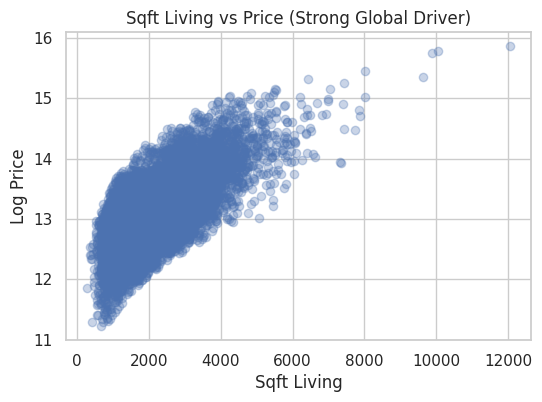

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["sqft_living"], df["log_price"], alpha=0.3)
plt.xlabel("Sqft Living")
plt.ylabel("Log Price")
plt.title("Sqft Living vs Price (Strong Global Driver)")
plt.show()


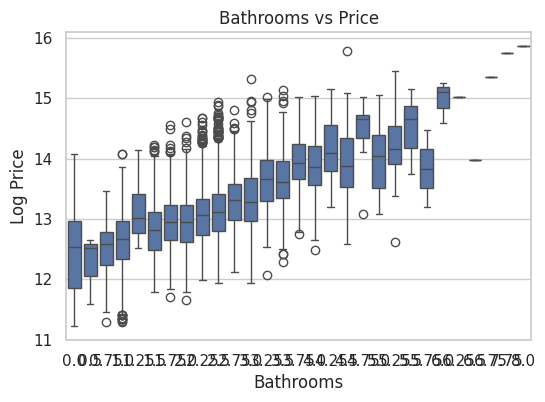

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["bathrooms"], y=df["log_price"])
plt.xlabel("Bathrooms")
plt.ylabel("Log Price")
plt.title("Bathrooms vs Price")
plt.show()


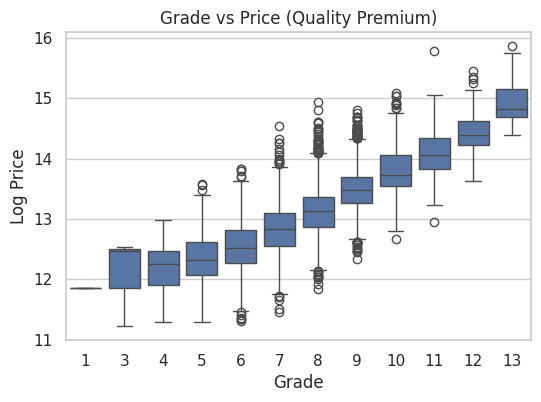

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["grade"], y=df["log_price"])
plt.xlabel("Grade")
plt.ylabel("Log Price")
plt.title("Grade vs Price (Quality Premium)")
plt.show()


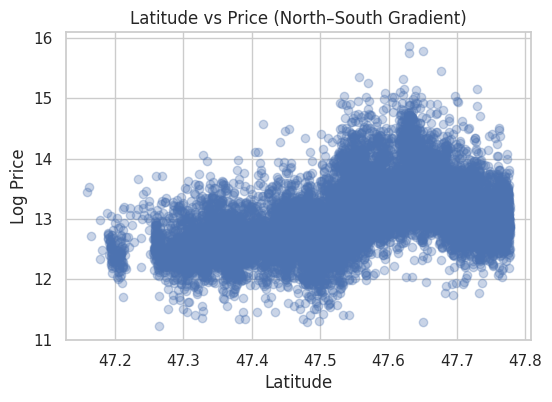

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["lat"], df["log_price"], alpha=0.3)
plt.xlabel("Latitude")
plt.ylabel("Log Price")
plt.title("Latitude vs Price (North–South Gradient)")
plt.show()


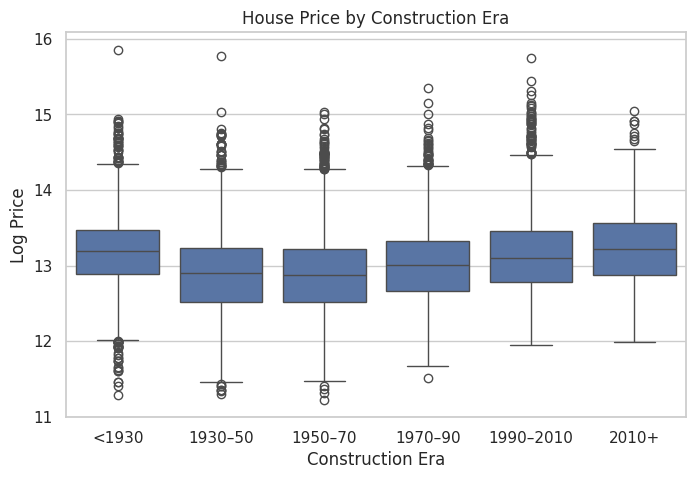

In [ ]:
df["year_bin"] = pd.cut(
    df["yr_built"],
    bins=[1890, 1930, 1950, 1970, 1990, 2010, 2025],
    labels=["<1930", "1930–50", "1950–70", "1970–90", "1990–2010", "2010+"]
)

plt.figure(figsize=(8,5))
sns.boxplot(x="year_bin", y="log_price", data=df)
plt.xlabel("Construction Era")
plt.ylabel("Log Price")
plt.title("House Price by Construction Era")
plt.show()


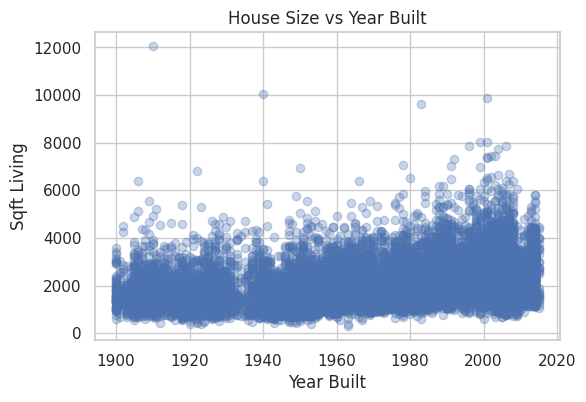

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["yr_built"], df["sqft_living"], alpha=0.3)
plt.xlabel("Year Built")
plt.ylabel("Sqft Living")
plt.title("House Size vs Year Built")
plt.show()


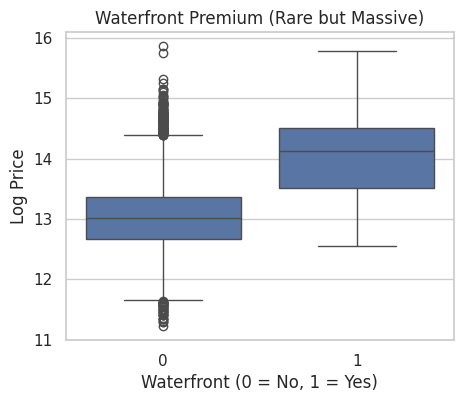

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x=df["waterfront"], y=df["log_price"])
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Log Price")
plt.title("Waterfront Premium (Rare but Massive)")
plt.show()


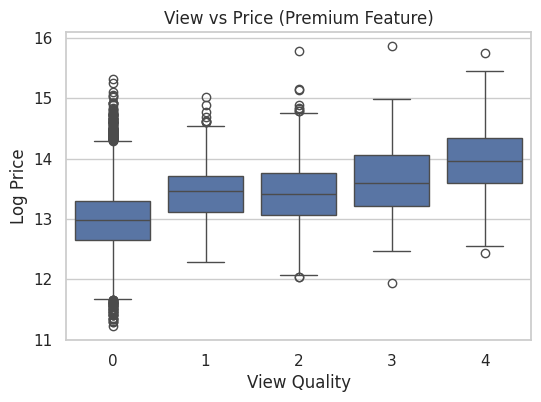

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["view"], y=df["log_price"])
plt.xlabel("View Quality")
plt.ylabel("Log Price")
plt.title("View vs Price (Premium Feature)")
plt.show()


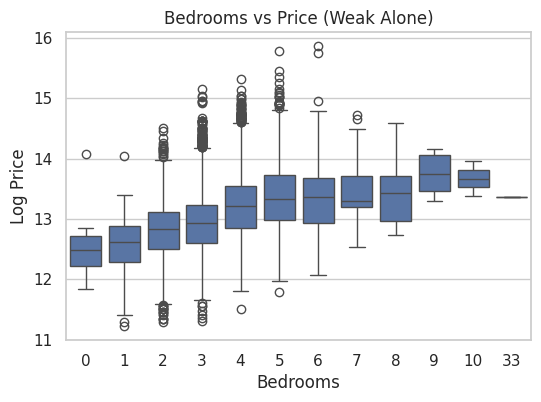

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["bedrooms"], y=df["log_price"])
plt.xlabel("Bedrooms")
plt.ylabel("Log Price")
plt.title("Bedrooms vs Price (Weak Alone)")
plt.show()


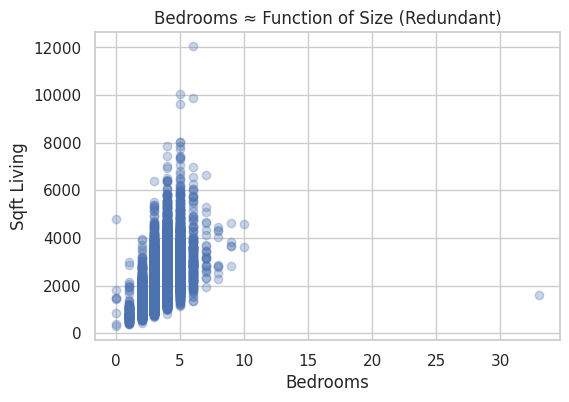

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["bedrooms"], df["sqft_living"], alpha=0.3)
plt.xlabel("Bedrooms")
plt.ylabel("Sqft Living")
plt.title("Bedrooms ≈ Function of Size (Redundant)")
plt.show()


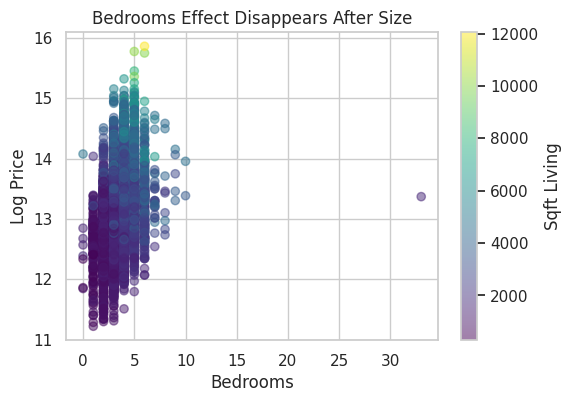

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    df["bedrooms"],
    df["log_price"],
    c=df["sqft_living"],
    cmap="viridis",
    alpha=0.5
)
plt.colorbar(label="Sqft Living")
plt.xlabel("Bedrooms")
plt.ylabel("Log Price")
plt.title("Bedrooms Effect Disappears After Size")
plt.show()


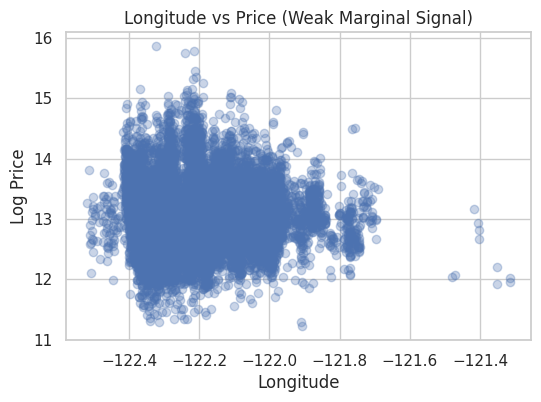

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["long"], df["log_price"], alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Log Price")
plt.title("Longitude vs Price (Weak Marginal Signal)")
plt.show()


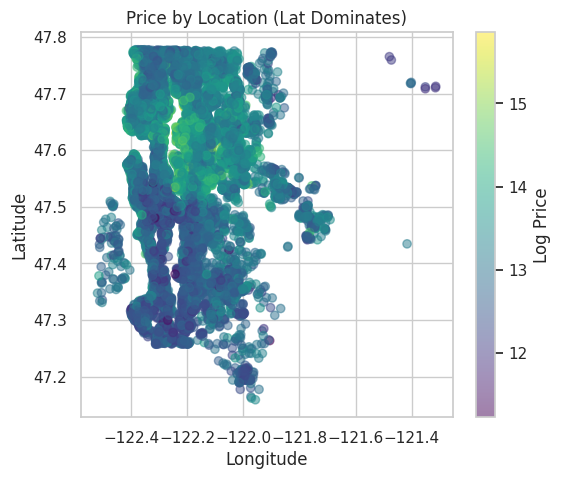

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(
    df["long"],
    df["lat"],
    c=df["log_price"],
    cmap="viridis",
    alpha=0.5
)
plt.colorbar(label="Log Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Price by Location (Lat Dominates)")
plt.show()


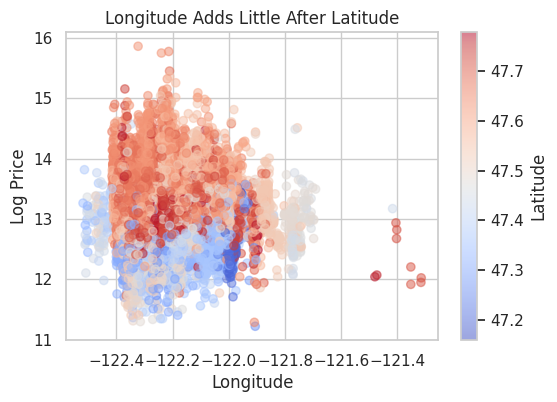

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    df["long"],
    df["log_price"],
    c=df["lat"],
    cmap="coolwarm",
    alpha=0.5
)
plt.colorbar(label="Latitude")
plt.xlabel("Longitude")
plt.ylabel("Log Price")
plt.title("Longitude Adds Little After Latitude")
plt.show()
